# Equação de Onda: resolução numérica e analítica

* PET- Física UFRN
* Petianos: Wallysson Pereira da Silva
* Data: 22/11/2024

$\quad$ O objetivo desse `Notebook` é fazer uma abordagem geral da **Equação de Onda**, explorando tanto uma de suas resoluções analíticas quanto uma resolução numérica. Tendo isso em vista, esse `Notebook` será dividido nos seguintes tópicos:
1. Introdução da Equação de Onda
2. Resolução Analítica
3. Resolução Numérica
4. Conclusão
5. Referências

$\quad$ A primeira seção estará meramente dedicada à apresentação da Equação de Onda.

$\quad$ Já na segunda seção, apesar de estar indexada como Resolução Analítica, iremos, ao obter a solução analítica utilizando o devido método, usar ferramentais computacionais para ilustrar o comportamento da onda por meio de gráficos.

$\quad$ A terceira parte é focada na resolução numérica da Equação de Onda. Aqui também será feita a devida ilustração do comportamento da onda através de gráficos.

$\quad$ Por fim, no quarto tópico desse `Notebook`, tem-se uma conclusão, com as devidas referências aqui utilizadas no quinto e último tópico. 


## Pré-requesitos

$\quad$ Para o total entendimento desse `Notebook`, é interessante que o leitor tenha conhecimentos básicos de programação (sobretudo em Python), junto de uma pequena noção sobre derivadas (totais e parciais) de funções. No entanto, como esse trabalho busca servir como uma base para quem está estudando a Equação de Onda, a abordagem aqui adotada buscará sempre ser bem elucidativa. Ainda, tanto na abordagem analítica quanto na numérica, conhecimentos prévios sobre Séries de Fourier e a Transformada Discreta de Fourier são necessários para o melhor entendimento dos métodos. 

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin, cos, pi
from numpy.fft import rfft, irfft

## Informações sobre as bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.12.7 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.22631 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Wed Nov 27 22:24:16 2024 Hora oficial do Brasil

## 1. Introdução

$\quad$ O estudo da Equação de Onda é de suma importância para a física, justamente pelo seu caracter geral no contexto de uma descrição física de fenômenos oscilatórios, governando tanto a propagação de uma onda mecânica (uma onda numa corda, por exemplo), quanto de uma onda eletromagnética. A Equação de Onda, demonstrado em [1], tem a seguinte forma: 

$$ \frac{\partial^2 u(x,t)}{\partial t^2} =  v^2 \frac{\partial^2 u(x,t)}{\partial x^2}, \tag{1.1}$$

onde $u(x,t)$ é a amplitude da oscilação numa dada posição $x$ e tempo $t$ e a constante $v$ é a velocidade segundo a qual uma pequena pertubação (onda) move-se ao longo da corda.  

$\quad$ Encontrar uma solução para a Equação de Onda significa resolver uma Equação Diferencial Parcial, que nesse caso, equivalentemente, significa encontrar a uma função $u(x,t)$ no qual suas derivadas parciais segundas se relacionem da maneira expressa acima. 

## 2. Resolução Analítica 

$\quad$ Começaremos com a resolução analítica da Equação de Onda, utilizando o **Método de Separação das Variáveis**. 

$\quad$ Para a resolução, iremos considerar o caso da **corda elástica com deslocamento inicial não nulo** apresentado em [1]. Nele, teremos uma corda com as extremidades fixas em $x=0$ e $x = L$ (ou seja, o valor de $u(x,t)$ é sempre igual a $0$ nessas extremidades). Assim:

$$u(0,t) = u(L,t) = 0. \tag{1.2}$$

$\quad$ As últimas considerações a serem feitas serão de que, em $t=0$ todos os pontos da corda não terão velocidade vertical e a posição inicial de cada ponto da corda será fornecida por uma dada função $f(x)$. Ou seja:

$$u(x,0) = f(x) \ \text{ e } \ \frac{\partial u(x,0)}{\partial t} = 0 . \tag{1.3}$$ 

$\quad$ Como já discutido, o resultado da EDP apresentada é uma função $u(x,t)$, ou seja, uma função de duas variáveis independentes. No presente método, estaremos supondo que $u(x,t)$ pode ser escrita como a **multiplicação** de duas funções, uma dependendo só da variável $x$ e outra dependente apenas de $t$:

$$u(x,t) = X(x)T(t). \tag{1.4}$$

$\quad$ Com essa condição imposta, obteremos os termos $\frac{\partial^2 u(x,t)}{\partial x^2}$ e $\frac{\partial^2 u(x,t)}{\partial t^2}$ e substituiremos em **(1.1)**. Para o termo espacial:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = \frac{\partial^2 [X(x) T(t)]}{\partial t^2}$$

$\quad$ Mas, considerando que estamos derivando em relação ao tempo, teremos que $X(x)$ pode ser tratado como uma constante. Daí segue, já considerando que a função restante na derivada temporal será uma função unica e exclusivamente da variável $t$, a derivada parcial se tornará uma derivada total:

$$\frac{\partial^2 u(x,t)}{\partial t^2} = X(x)\frac{\partial^2 T(t)}{\partial t^2}  
\implies \frac{\partial^2 u(x,t)}{\partial t^2} = X(x) T^{\prime\prime}(t) \tag{1.5}$$

$\quad$ Com um raciocíno análogo, obtemos o termo equivalente para a derivada espacial:

$$\frac{\partial^2 u(x,t)}{\partial x^2} = T(t) X^{\prime \prime}(x) \tag{1.6}$$

$\quad$ Utilizando **(1.5)** e **(1.6)** na Equação de Onda, obtém-se:

$$ X(x) T^{\prime\prime}(t) = v^2 T(t) X^{\prime \prime}(x)$$

$\quad$ Agora é conviente organizar essa igualdade da seguinte forma:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)}     $$

$\quad$ Segue-se uma pequena análise da expressão obtida: de um lado temos uma função só de $x$, do outro uma função só de $t$. Contudo, como as funções estão intimamente ligadas por uma igualdade, tiramos que elas obrigatoriamente terão que ser iguais a uma dada constante. Para essa conclusão, basta pensarmos, por exemplo, que estamos variando o $x$ da expressão à esquerda. Porém, nada nos obriga a estar variando o $t$ ao mesmo tempo que variamos $x$ (já que as variáveis são independentes). Assim, mesmo que a variável $x$ esteja assumindo diferentes valores (fato que poderia estar alterando todo o termo $\frac{X^{\prime\prime}(x)}{X(x)}$), o termo $\frac{X^{\prime\prime}(x)}{X(x)}$ não pode estar variando, justamente porque $\frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)}$ estará constante.

$\quad$ Denominando a constante de $\lambda$, obtemos a relação:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)} = \lambda   \tag{1.7}$$

$\quad$ Iremos analisar o termo espacial e o temporal separadamente. 

- Para o termo espacial:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \lambda \ \implies  \ X^{\prime\prime}(x) = \lambda X(x)$$ 

$\quad$ Onde obtemos simplemsente a EDO (Equação Diferencial Ordinária):

$$ X^{\prime\prime}(x) - \lambda X(x) = 0, $$ 

$\quad$ que pode ser resolvida obtendo-se a equação característica e determinando a solução geral. A raiz da equação característica será:

$$ r^2 - \lambda = 0 \implies r = \pm \sqrt{\lambda}. $$

$\quad$ Na expressão acima tem-se 3 possíveis casos para constante: $\lambda = 0$, $\lambda > 0$ e $\lambda <0$. Contudo, como argumentado em **[1]**, as soluções obtidas quando consideramos os dois primeiros casos não safistazem a condição de contorno. Por isso, o terceiro caso prevalece e $\lambda$ será necessariamente uma constante negativa.  

$\quad$ Com isso em mente, para facilitar os desenvolvimentos seguintes, explecitaremos o sinal negativo de $\lambda$ em **(1.7)**:

$$ \frac{X^{\prime\prime}(x)}{X(x)} = \frac{1}{v^2} \frac{T^{\prime\prime}(t)}{T(t)} = -\lambda,   \tag{1.8}$$

onde $\lambda$ essencialmente se torna um valor positivo, já que explicitamos o sinal negativo na igualdade. Repetindo a análise da equação característica para o termo espacial, mas agora considerando **(1.7)**, obtém-se:

$$r = \pm \sqrt{-\lambda} = \pm \sqrt{-1} \sqrt{\lambda} \ \therefore \ r = \pm i\sqrt{\lambda} .$$

$\quad$ Como também demonstrado em **[1]**, a solução geral para uma EDO de segunda ordem homogênea com raiz complexa $\alpha \pm \beta i$ é: 

$$ X(x) = e^{\alpha}(A\cos{\beta x} + B\sin{\beta x}),$$

onde $A$ e $B$ são constantes. Então, como no nosso caso $\alpha = 0$ e $\beta = \sqrt{\lambda}$, a solução geral se torna:

$$ X(x) = A\cos{\sqrt{\lambda}x} + B\sin{\sqrt{\lambda} x}. \tag{1.9}$$

$\quad$ Analisaremos a função $X(x)$ obtida em relação às condições iniciais. Considerando primeiro a condição exposta em **(1.2)**, tem-se que $u(0,t) = X(0)\cdot T(t) = 0$, onde se obtém que $X(0) = 0$ (para evitar a solução trivial onde $T(t) = 0$ para todo $t$). Então, aplicando essa condição em **(1.8)**:

$$X(0) = A\cos{\sqrt{\lambda} 0} + B\sin{\sqrt{\lambda} 0} = A = 0,$$

reduzindo **(1.8)** à: 

$$ X(x) = B\sin{\sqrt{\lambda} x}. \tag{1.10}$$

Aplicando a segunda condição de **(1.2)**, onde $u(L,t) = X(L)\cdot T(t) = 0$, tiramos que $X(L) = 0$, novamente para evitar uma solução trivial onde $T(t) = 0$ para todo $t$. Assim:

$$ X(L) = B\sin{(\sqrt{\lambda}L)} = 0.$$

 Se a constante $B$ for igual a zero também, caímos na solução trivial para $X(x)$. Então teremos que o termo do seno será igual a zero:

$$ \sin{\sqrt{\lambda}L} = 0.$$

Para essa relação ser satisfeita, tem-se uma limitação para o valor de $\lambda$, onde ele tem que ser tal que respeite: 

$$ \sqrt{\lambda} L = n\pi, \ \text{onde } n \in \mathbb{N}.$$

Ou seja: 

$$ \sqrt{\lambda}= \frac{n\pi}{L}. \tag{1.11}$$

$\quad$ Substituindo o valor $\lambda$ exposto em **(1.10)** na equação **(1.9)**, chega-se na solução para o termo espacial:

$$ X_n(x) = B_n\sin{(\frac{n\pi}{L}x)}, \tag{1.12}$$

onde o infixo $n$ foi inserido para destacar que temos uma família de soluções aqui, onde cada $n$ determina uma solução particular diferente. 

- Para o termo temporal:

$\quad$ A equação **(1.8)** nos fornece a EDO:

$$T^{\prime\prime}(t)+v^2\lambda T(t) = 0,$$

de onde tiramos a equação característica:

$$ r^2 + v^2\lambda = 0 \implies r = \pm \sqrt{-v^2 \lambda} = \pm v\sqrt{-\lambda} \ \therefore \ r = \pm iv\sqrt{\lambda}.$$

$\quad$ Novamente aplicando a solução geral $T(t) = e^{\alpha}(A\cos{\beta t} + B\sin{\beta t})$ para uma equação característica com raíz complexa, com $\alpha = 0$ e $\beta = v\sqrt{\lambda}$ e denominando as constante por $A = K_1$ e $B = K_2$:

$$ T(t) = K_1\cos{(v \sqrt{\lambda} t)} + K_2\sin{(v \sqrt{\lambda} t)}. \tag{1.13}$$

$\quad$ Aplicando a segunda condição inicial exposta em **(1.3)**:

$$\frac{\partial u(x,0)}{\partial t} = \frac{\partial [X(x)\cdot T(0)]}{\partial t} = X(x)\frac{d T(0)}{dt} = 0,$$

onde, novamente para evitar a solução trivial, teremos que:

$$ \frac{d T(0)}{dt} = 0.$$

Aplicando essa condição à expressão $\frac{d T(t)}{dt} = \frac{d}{dt}(K_1\cos{(v \sqrt{\lambda} t)} + K_2\sin{(v \sqrt{\lambda} t)}) = -v\sqrt{\lambda}K_1\sin{(v \sqrt{\lambda} t)} + v\sqrt{\lambda}K_2\cos{(v \sqrt{\lambda} t)} $ obtida, teremos:

$$ \frac{d T(0)}{dt} = -v\sqrt{\lambda}K_1\sin{(v \sqrt{\lambda} 0)} + v\sqrt{\lambda}K_2\cos{(v \sqrt{\lambda} 0)} = 0 \implies v\sqrt{\lambda}K_2 = 0 \implies K_2 = 0.$$

$\quad$ Assim, a solução **(1.13)** se reduz à:

$$ T(t) = K_1\cos{(v\sqrt{\lambda}t)}.$$

$\quad$ Contudo, $\sqrt{\lambda}$ já tem um valor determinado, exibido em **(1.11)**. Substituindo-o:

$$ T_n(t) = K_1\cos{(v\frac{n\pi}{L}t)}. \tag{1.14}$$

$\quad$ Por fim, justando o resultado obtido em **(1.12)** e em **(1.14)** e substituindo em **(1.4)**:

$$u_n(x,t) = B_n\sin{(\frac{n\pi}{L}x)} K_n\cos{(v\frac{n\pi}{L}t)}. \tag{1.15}$$

Para cada $n$ na expressão teremos uma solução particular. Contudo, para satisfazer qualquer condição inicial, teremos que considerar uma superposição dessas soluções fundamentais. Assim, determina-se a seguinte forma para $u(x,t)$:

$$ u(x,t) = \sum_{i=1}^{\infty} B_n\sin{\left(\frac{n\pi}{L}x\right)}K_n\cos{\left(v\frac{n\pi}{L}t\right)}. \tag{1.16}$$

$\quad$ Como $B_n$ multiplicado com $K_n$ resulta numa outra constante, faremos a substituição $C_n = B_nK_n$:

$$ \boxed{u(x,t) = \sum_{i=1}^{\infty} C_n\sin{(\frac{n\pi}{L}x)}\cos{(v\frac{n\pi}{L}t)}. \tag{1.17}}$$

$\quad$ Obtida essa solução, vamos aplicar a condição inicial $u(x,0) = f(x)$: 

$$ u(x,0) = \sum_{i=1}^{\infty} C_n\sin{\left(\frac{n\pi}{L}x\right)}\cos{\left(\frac{n\pi}{L}0\right)} = \sum_{i=1}^{\infty} C_n\sin{\left(\frac{n\pi}{L}x\right)} = f(x).$$

Onde a igualdade $f(x) = \sum_{i=1}^{\infty} C_n\sin{\left(\frac{n\pi}{L}x\right)}$ nos dá a informação de que os $C_n$ são os coeficientes de Fourier da função $f(x)$ expandida em senos.

$\quad$ Com isso já podemos partir para uma implementação dessa solução. Usaremos a seguinte função $f(x)$ como condição inicial (tanto agora quanto na parte do método numérico): 

$$ f(x) = 
\begin{cases} 
    x, & \text{se } 0 \leq x < \frac{L}{2} \\
    L-x, & \text{se } \frac{L}{2} \leq x < L 
\end{cases}
\tag{1.18}$$

onde usaremos $L = 1m$. À primeira vista parece uma condição inicial estranha, mas ela nos retorna simplesmente um bico, com o seu valor máximo em $x = \frac{L}{2}$. Isso ficará mais visualmente apresentável logo mais.

$\quad$ Definindo a função $f(x)$ no código:

In [3]:
def f(x, L):
    if x>=0 and x<(L/2):
        return x
    if x>=(L/2) and x<=L:
        return L-x

$\quad$ Definida a função, os coeficientes $C_n$ já podem ser determiados (utilizados na solução).

$\quad$ Já considerando que $f(x)$ extendida de $x = -L$ até $x = L$ será uma função ímpar (já que queremos a sua expansão em senos), os coecificentes serão obtedos pela seguinte integral **[1]**: 

$$ C_n = \frac{2}{L} \int_{0}^{L} f(x)\sin{\left(\frac{n\pi x}{L}\right)} \, dx.$$

$\quad$ Visto que o desenvolvimento dos coeficientes $C_n$ é consideravalmente longo, ele será omitido do corpo principal desse trabalho. Sua dedução está detalhadamente exibida no *Apêndice A*. O resultado lá exibido é:

$$ C_n  = 
\begin{cases} 
    \frac{4}{n^2\pi^2} (-1)^{\frac{n-1}{2}}, & \text{se n for ímpar} \\
    0, & \text{se n for par}  
\end{cases}$$

$\quad$ Já implementando esse resultado:

In [4]:
def C(n):
    if n%2 == 0:
        return 0
    else:
        return (4/(n**2*pi**2))*(-1)**((n-1)/2)

$\quad$ Terminando com a consideração de que $v = 4 m/s$, já temos tudo necessário para desenvolver o código de aplicação.

$\quad$ Primeiro determinando algumas variáveis importantes para o desenrolar do código, junto com a visualização da condição inicial:

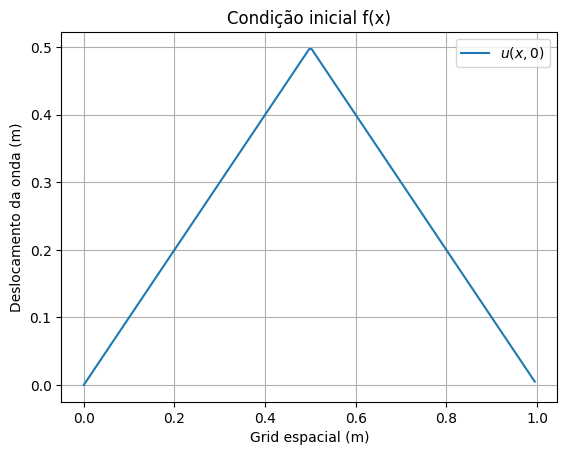

In [5]:
a = 0 # Extremidade à esquerda.
L = 1 # Extremidade à direita .
N = 201 # Número de repartições do intervalo.
v = 4 # Parametro (velocidade) da equação de onda.
dx = (L-a)/N # Espaçamendo do grid espacial.
xs = np.arange(a,L,dx) # Grid espacial.
ys = np.zeros(N, float) # Array para armazenar a condição inicial.
for i in range(N):
    ys[i] = f(xs[i],L)

plt.plot(xs,ys, label = "$u(x,0)$")
plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.grid()
plt.legend()
plt.title("Condição inicial f(x)")
plt.show()

$\quad$ Como obviamente é impossível obter todos os infinitos coeficientes $C_n$, truncaremos o seu valor para um dado valor máximo. Assim:

In [6]:
Max = 100 # O valor máximo de coeficientes Cn que usaremos.
Cn = np.zeros(Max, float)
for n in range(1,Max):
    Cn[n] = C(n)

$\quad$ O restante do código é dedicado à aplicação da solução exposta em **(1.17)**, junto com sua visualização através de gráficos.

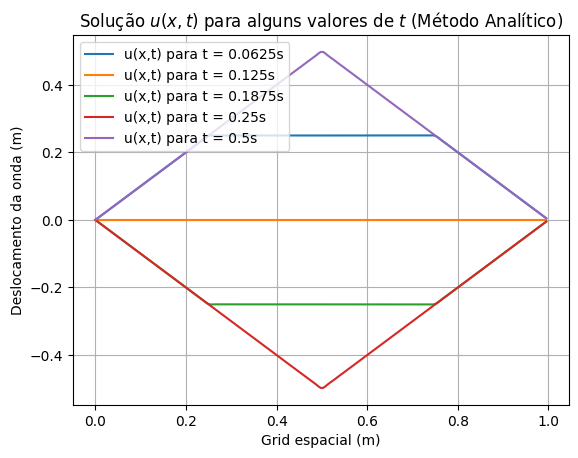

In [7]:
tempos = [0.0625, 0.125, 0.1875, 0.25, 0.5] # Array com os instantes de tempo em que analisaremos a onda.

u_x_t_fourier = [] # Lista para salvar a solução u(x,t) em cada t usando o método analítico.

for t in tempos:
    u_x_t = np.arange(a,L,dx) # Cria um array vazio equivalente à grade espacial.
    for i in range(N): # Percorre todo o grid espacial no dado tempo t iniciado no for anterior.
        aux = 0
        for n in range(Max): # Para cada ponto do grid espacial, executa um somatório com todos os coeficientes Cn, que convirgirá para o valor da oscilação da naquele dado ponto.
            aux+= Cn[n]*sin(n*pi*(i*dx)/L)*cos(v*n*pi*t/L)
        u_x_t[i] = aux
        
    u_x_t_fourier.append(u_x_t) # Adiciona a solução u(x,t) no dado tempo t à lista anteriormente criada.
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}s') # Plota a solução u(x,t) no tempo em questão.
    
u_x_t_fourier = np.array(u_x_t_fourier) # Apenas para transformar a lista num array.

plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Analítico)")
plt.grid()
plt.legend()
plt.show()

## COLOCAR OS PLOTS DE TEMPO UM DO LADO DO OUTRO

$\quad$ No figura exibida, é possível perceber, em $t=0.5s$, o valor de $u(x,t)$ é igual à condição inicial, ou seja, nesse tempo já foi percorrido uma oscilação completa. Como as imagem são exatamente iguais, tem-se a interpretação física de que a onda não está perdendo energia ao decorrer da sua oscilação. Assim, a sua amplitude de oscilação máxima será constante. 

$\quad$ Um fato interessante, porém trivial, para se notar é que, apesar da corda só estar definida para $x$ entre $0 \ m$ e $L = 1.0 \ m$, a solução, por ser baseada no ferramental das Série de Fourier, acaba sendo definida em todo o intervalo real, sobre a forma de uma função ímpar com comprimento de onda igual a $2L$. Tiraremos um pequenos vislumbre dessa propriedade da solução, plotando a solução no intervalo $[-3,3]$:

In [8]:
# Para t = 0:
xs_ = np.arange(-3,3,dx) # Grid espacial, dessa vez definido entre [-3,3], e não apenas entre [0,1].
u_x_t = np.zeros(len(xs_), float) # Array para armazenar o valor da função

for i in range(len(xs3)):
    aux = 0
    for n in range(Max):
        aux+= Cn[n]*sin(n*pi*(xs3[i])/L)*cos(v*n*pi*0/L)
    u_x_t[i] = aux
        



plt.plot(xs3,u_x_t)
plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,0)$ no intervalo [-3,3]")
plt.grid()
plt.legend()
plt.show()


NameError: name 'xs3' is not defined

$\quad$ No gráfico acima é notável que ocorre uma oscilação completa da onda ao percorrer $2m$ (o que equivale a $2L$), e que isso se extende para todo o intervalo real.

## 3. Resolução Numérica

$\quad$ Considere novamente uma onda numa corda de comprimento $L$, com as extremidades fixadas tal que $u(x,t) = 0$ em $x=0$ e $x=L$. Para o desenvovimento do denominado **Método Espectral**, assim como exposto em **[2]**, consideraremos a seguinte solução trivial para a Equação de Onda:

$$ u_k(x,t) = \sin{\left(\frac{\pi kx}{L}\right)}e^{i\omega t}. \tag{2.1}$$

Assimindo que $u$ deve ser sempre real, nós deveríamos pegar a parte real da solução, mas, será mais conviente usar a forma complexa e pegar a parte real apenas no final do desenvolvimento do método. Também é natural o desenvolvimento para confirmar que a expressão respeita a Equação de Onda **[2]**, com a condição de que: 

$\quad$ Também é natural o desenvolvimento para confirmar que a expressão respeita a Equação de Onda **[2]**, desde que:

$$ \omega = \frac{\pi vk}{L}. \tag{2.2}$$

$\quad$ Agora discretizaremos o domínio espacial, dividindo a corda em $N$ intervalores iguais, com $N+1$ pontos. A expressão para o enésimo ponto do grid será dada por:

$$ x_n = \frac{n}{N}L. \tag{2.3}$$

$\quad$ Ao substituir **(2.2)** e **(2.3)** na expressão da solução trivial, obteremos:

$$u_k(x_n,t) = \sin{\left(\frac{\pi k}{L}x_n\right)}exp{\left(i\frac{\pi vk}{L}t\right)}.$$

$$ \implies u_k(x_n,t) = \sin{\left(\frac{\pi k}{L}\frac{nL}{N}\right)}exp{\left(i\frac{\pi vkt}{L}\right)}.$$

$$ \implies u_k(x_n,t) = \sin{\left(\frac{\pi k n}{N}\right)}exp{\left(i\frac{\pi vkt}{L}\right)}. \tag{2.4}$$

$\quad$ Contudo, **(2.4)** não é apta a satisfazer qualquer condição inicial. Para resolver isso, consideraremos uma superposição dessas expressões, assim permitindo a determinação de condições iniciais mais gerais. Vale lembrar que só podemos realizar esse passo porque a Equação de Onda é linear. Assim:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} b_k \sin{\left(\frac{\pi k n}{N}\right)}exp{\left(i\frac{\pi vkt}{L}\right)}, \tag{2.5}$$

onde $b_k$ são coeficientes qualquer e o termo $\frac{1}{N}$ foi adicionado para possibilitar futuras comparações a Transformada Direta de Fourier. Como $b_k$ pode ser um número complexo, podemos considerar a seguinte forma para ele: 

$$ b_k = \alpha_k + i\eta_k. \tag{2.6}$$

$\quad$ Assim, substituindo **(2.6)** em **(2.5)**:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \left( \alpha_k + i\eta_k\right) \sin{\left(\frac{\pi k n}{N}\right)}exp{\left(i\frac{\pi vkt}{L}\right)}. \tag{2.7}$$

$\quad$ Aplicando a condição inicial $u(x,0) = f(x)$:

$$ u(x_n,0) = \frac{1}{N}\sum_{k=1}^{N-1} \left(\alpha_k + i\eta_k \right) \sin{\left(\frac{\pi k n}{N}\right)}exp{\left(i\frac{\pi vk0}{L}\right)} = f(x_n)\ \therefore \ f(x_n) = \frac{1}{N}\sum_{k=1}^{N-1} \left(\alpha_k + i\eta_k \right) \sin{\left(\frac{\pi k n}{N}\right)}.$$

Contudo, considerando a própria natureza física de $u(x,0) = f(x)$, teremos que o lado esquerdo da equação sempre será um valor real, justamente porque um deslocamento sempre o é. Assim, para a igualdade ser verdadeira, $b_k$ será composto apenas pela parte real $\alpha_k$, resultando em:

$$ f(x_n) = \frac{1}{N}\sum_{k=1}^{N-1} \alpha_k \sin{\left(\frac{\pi k n}{N}\right)}, \tag{2.8}$$

que é uma série de Forier em senos com coeficientes $\alpha_k$. $f(x_n)$ representa o valor da função avaliado em cada ponto $x_n$. Utilizando a função **rfft** da biblioteca `numpy.fft`, pode-se obter os coeficientes da Transformada Discreta de Fourier de $f(x_n)$. Contudo, assim como destacada na sessão 7.4.3 de **[2]**, devemos pegar apenas as constantes ligadas à parte imaginária dos coeficientes, já que estes estão ligados à expansão da função em senos, descartando os coeficientes reais (que nesse caso teriam influência no termos de cosseno). O processo descrito está materalizado na seguinte função:

In [ ]:
# Transformada Discreta de Fourier em senos de uma dada coleção de dados y
def dst(y):
    N = len(y)
    y2 = np.empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    
    y2[len(y2)-1:N:-1] = -1*y[1:]
    
    a = -np.imag(rfft(y2))[:N]
    a[0] = 0.0

    return a

A função recebe uma coleção de dados $y$ e retorna seus coeficientes em senos da Transformada Discreta de Fourier. No nosso caso, $y = f(x_n)$.

$\quad$ De forma similar, podemos fazer essa análise com a outra condição inicial $\frac{\partial u(x_n,0)}{\partial t}$. Primeiro obtendo $\frac{\partial u(x_n,t)}{\partial t}$, utilizando o valor de $u(x_n,t)$ fornecido por **(2.7)**:

$$ \frac{\partial u(x_n,t)}{\partial t} = \frac{\partial \left[\frac{1}{N}\sum_{k=1}^{N-1} ( \alpha_k + i\eta_k) \sin{\left(\frac{\pi k n}{N}\right)}exp{\left(i\frac{\pi vkt}{L}\right)}\right]}{\partial t} = \frac{1}{N} \sum_{k=1}^{N-1} \left(\alpha_k + i\eta_k \right) \sin{\left(\frac{\pi k n}{N}\right)} \frac{\partial \left[exp{(i\frac{\pi vkt}{L})}\right]}{\partial t}.$$

$$\implies \frac{\partial u(x_n,t)}{\partial t} = \frac{1}{N} \sum_{k=1}^{N-1}\left( \alpha_k + i\eta_k \right) \sin{\left(\frac{\pi k n}{N}\right)} \exp{\left(\frac{i\pi v k t}{L}\right)} \frac{i\pi vk}{L}.$$

$$\implies \frac{\partial u(x_n,t)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} \frac{\pi v k}{L} (i\alpha_k -\eta_k) \sin{\left(\frac{\pi k n}{N}\right)} \exp{\left(\frac{i\pi v k t}{L}\right)}. \tag{2.9}$$

$\quad$ Considerando o instante de tempo com $t=0$ em **(2.9)**:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} \frac{\pi vk}{L} \left(i\alpha_k -\eta_k\right) \sin{\left(\frac{\pi k n}{N}\right)}.$$

$\quad$ Recaindo no mesmo argumento de que o termo à esquerda da expressão é sempre um valor real, consequentemente desconsiderando a parte imaginária à direita, obtemos:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} \frac{\pi v k}{L} (-\eta_k) \sin{\left(\frac{\pi k n}{N}\right)}.$$

$$ \implies \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} \left(-\frac{\pi v k}{L}\right) \eta_k \sin{\left(\frac{\pi k n}{N}\right)}, \tag{2.10}$$

onde chegamos em uma outra série de Fourier em senos, dessa vez com coeficientes $\left(-\frac{\pi v k}{L}\right) \eta_k $. Considerando um coeficiente


$$o_k = \left(-\frac{\pi v}{L}\right) k\eta_k, \tag{2.11}$$

podemos modificar **(2.10)** para:

$$ \frac{\partial u(x_n,0)}{\partial t} = \frac{1}{N}  \sum_{k=1}^{N-1} o_k \sin{\left(\frac{\pi k n}{N}\right)}.\tag{2.12}$$

Percebe-se a total enorme semelhança entre **(2.12)** e **(2.8)**, com a única diferença de que tem-se a condição inicial da velocidade vertical da corda ao invés da sua amplitude de oscilação. No desenvolvimento do método analítico foi-se considerado que a velocidade do vertical em cada ponto era nula. Porém, para fins de generalização do Método Espectral, consideraremos que

$$ \frac{\partial u(x_n,0)}{\partial t} = g(x_n),$$

onde a função $g(x_n)$ for informará a velocidade vertical inicial da corda para cada ponto $x_n$. Assim, **(2.12)** pode ser reescrita como:

$$ g(x_n) = \frac{1}{N}  \sum_{k=1}^{N-1} o_k \sin{\left(\frac{\pi k n}{N}\right)}.\tag{2.12}$$

$\quad$ Comparando **(2.12)** com **(2.8)**, pode-se concluir que podemos obter os coeficientes $o_k$ da mesma forma que obteríamos $\alpha_k$, dessa vez apenas considerando o conjunto de pontos $g(x_n)$ e não mais os $f(x_n)$. Feito isso, pode-se obter os coeficientes $\eta_k$, utlizando a relação exposta em **(2.11)**:

$$ \eta_k = \frac{o_k}{k} \left(-\frac{L}{\pi v}\right). \tag{2.13}$$

$\quad$ Agora sabendo o caminho para a obtenção dos coeficeintes $\alpha_k$ e $\eta_k$, voltaremos para **(2.7)**:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \left( \alpha_k + i\eta_k\right) \sin{\left(\frac{\pi k n}{N}\right)}exp{\left(i\frac{\pi vkt}{L}\right)}. $$

$\quad$ Utilizando a identidade de Euler $e^{i\theta} = \cos{(\theta)} + i\sin{(\theta)}$, com $\theta = \frac{\pi vkt}{L}$:

$$ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \left(\alpha_k+i\eta_k\right) \sin{\left(\frac{\pi k n}{N}\right)}\left[\cos{\left(\frac{\pi vkt}{L}\right)} + i\sin{\left(\frac{\pi vkt}{L}\right)}\right] $$

$$ \implies u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \left[\alpha_k\cos{\left(\frac{\pi vkt}{L}\right)} + \alpha_ki\sin{\left(\frac{\pi vkt}{L}\right)} + i\eta_k\cos{\left(\frac{\pi vkt}{L}\right)} + i\eta_ki\sin{\left(\frac{\pi vkt}{L}\right)}\right]\sin{\left(\frac{\pi kn}{N}\right)}. \tag{2.14}$$

$\quad$ Como argumentado ainda na introdução do método, ao considerar que $u$ é definido apenas para valores reais, pode-se desconsiderar a parte imaginária do somatório em **(2.14)**. Assim:

$$\boxed{ u(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} \left[\alpha_k\cos{\left(\frac{\pi vkt}{L}\right)}-\eta_k\sin{\left(\frac{\pi vkt}{L}\right)}\right]\sin{\left(\frac{\pi kn}{N}\right)}. \tag{2.15} }$$

$\quad$ Esta é expressão final do Método Espectral, onde, determinados os coeficientes $\alpha_k$ e $\eta_k$ através das condições inicial para a posição e velocidade da corda, podemos avaliar o instantêneo de oscilação da corda para qualquer $t$ em questão.  

$\quad$ Implementando a solução obtida:

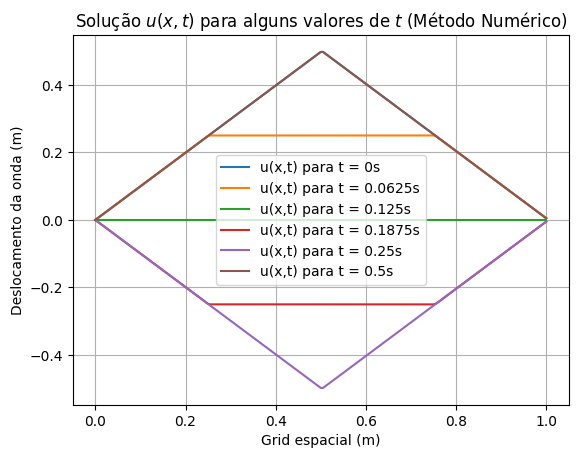

In [ ]:
# Iremos utilizar os mesmos padrões para o grid espacial anterior utilizado (ou seja, o dx é o mesmo) e o mesmo array de tempos. 

u_x_0 = np.zeros(N, float)

for i in range(N):
    u_x_0[i] = f(i*dx, L) # Obtendo a condição inicial








alfas = dst(u_x_0) # Obtendo os alfas_k

# Os etas são todos nulo, pois não há velocidade inicial 
etas = np.zeros(len(alfas), float) # todos etas = 0

u_x_t_espectral = [] # Lista para armazenas a solução u(x,t) para cada instante de tempo analisado, dessa vez utilizando o método espectral

for t in tempos:
    u_x_t = np.zeros(N, float) # Cria um grid espacial
    for n in range(N): # Percorre todo o grid espacial
        aux = 0
        for k in range(1,N):
            aux += (alfas[k]*cos(pi*v*k*t/L)-etas[k]*sin(pi*v*k*t/L))*sin(pi*k*n/N)    # Solução do método espectral; o somatório converge para o valor de u(xn,t) no dado ponto xn em análise
        u_x_t[n] = aux/N # Há o fator 1/N ainda na solução

    u_x_t_espectral.append(u_x_t) # Adiciona a solução à lista criada para esse método
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}s') # Plota a solução no dado tempo em análise 

u_x_t_espectral = np.array(u_x_t_espectral)


# Estética do plot
plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Numérico)")
plt.grid()
plt.legend()
plt.show()

$\quad$ Como o esperado, a solução foi idêntica à obtida anteiormente com o método analítico, o que podemos confirmar através do período de oscilação da onda. Ela também leva $T = 0.5s$ para realizar uma osclação completa. 

$\quad$ Utilizando os arrays criados com o armazenamento da solução tanto analítica quanto numérica para cada $t$, a seguir definiremos um erro relatido e plotaremos a magnetude desse erro para cada ponto do grid espacial.

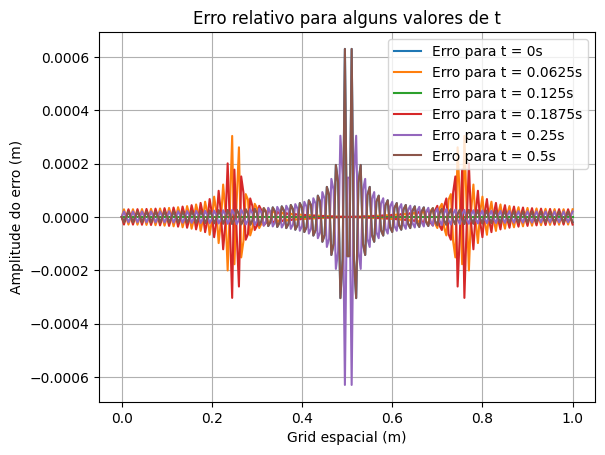

In [ ]:
erro =  u_x_t_fourier - u_x_t_espectral

for t in range(len(tempos)):
    plt.plot(xs, erro[t], label = f'Erro para t = {tempos[t]}s')    
plt.xlabel("Grid espacial (m)")
plt.ylabel("Amplitude do erro (m)")
plt.title("Erro relativo para alguns valores de t")
plt.grid()
plt.legend()
plt.show()

$\quad$ Com essa imagem, obtemos um perfil da discrepância entre os métodos em cada ponto do grid. Percebe-se que o instante de tempo responsável pela maior amplitude de erro é $t = 0s$, $t=0,25s$, $t=0.5s$, justamente quando a onda está no seu ápice (ou vale, como é o caso para $t=0.25$). A região espacial onde ocorre essa maior discrepância é justamente aquela próxima à metade do intervalo. 

$\quad$ Aqui farei uma rápida resolução de um caso onde a corda tem velocidade inicial não nula, o que consequentemente fará com que os $\eta_n$ deixem de ser nulos.

$\quad$ Manteremos todas as outras condições inalteradas, adicionando apenas:

$$ \frac{\partial u(x,0)}{\partial t} = -1,$$

ou seja, todo ponto da corda terá uma velocidade vertical inicial de $-1 m/s$, onde o sinal negativo siginifica que tal velocidade está na direção negativa do eixo vertical. 

$\quad$ Relembrando a relação:

$$ \eta_k = \frac{o_k}{k} (-\frac{L}{\pi v}),   $$

onde o coeficiente $o_k$ é o obtido diretamente pela Transformada Direta de Fourier em senos da condição inicial da velocidade.

Implementando:

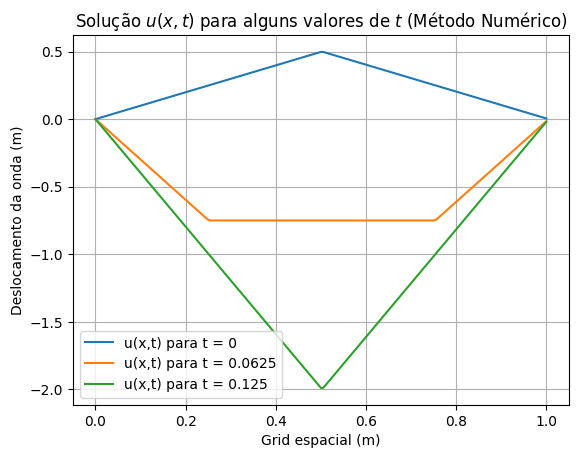

In [ ]:
del_u_x_0 = -np.ones(N, float) #

tempos = [0, 0.0625, 0.125] # Definiremos novos tempos de análise, para melhor visualização do resultado

o_k = dst(del_u_x_0)
eta_k_2 = -(L/pi*v)*o_k

for t in tempos:
    u_x_t = np.zeros(N, float)
    for n in range(N):
        aux = 0
        for k in range(1,N):
            eta = eta_k_2[k]/k


            aux += (alfas[k]*cos(pi*v*k*t/L)-eta*sin(pi*v*k*t/L))*sin(pi*k*n/N)    # Solução do método 
        u_x_t[n] = aux/N
    
    plt.plot(xs,u_x_t, label = f'u(x,t) para t = {t}')


plt.xlabel("Grid espacial (m)")
plt.ylabel("Deslocamento da onda (m)")
plt.title("Solução $u(x,t)$ para alguns valores de $t$ (Método Numérico)")
plt.grid()
plt.legend()
plt.show()


## Conclusão

## Apêndice A

$\quad$ Tem-se o objetivo de determinar o resultado da integral:

$$ C_n = \frac{2}{L} \int_{0}^{L} f(x)\sin{\left(\frac{n\pi x}{L}\right)} \, dx. \tag{1}$$

$\quad$ Tendo em vista que função em questão é:

$$ f(x) = 
\begin{cases} 
    x, & \text{se } 0 \leq x < \frac{L}{2} \\
    L-x, & \text{se } \frac{L}{2} \leq x < L 
\end{cases},
$$

podemos manipular os limites da integral em **(1)** e separar em outras 2 integrais:

$$ C_n = \frac{2}{L}\left[\int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx + \int_{\frac{L}{2}}^{L} (L-x)\sin{\left(\frac{n\pi x}{L}\right)} \, dx\right]. \tag{2}$$

$\quad$ A resolução de cada integral será feita individualmente. 

- Para a primeira integral de **(2)**:

$$ \int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx . \tag{3}$$

$\quad$ Utilizaremos a tecnica de integração por partes $\int fg^{\prime} = fg - \int f^{\prime}g$, com $f = x$ e $g^{\prime} = sin{(\frac{n\pi x}{L})}$. Sabendo que $f^{\prime} = 1$ e $g = -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}$, desenvolve-se **(3)**:

$$ \int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = x \left[-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\right]_{0}^{\frac{L}{2}} - \int_{0}^{\frac{L}{2}} -\frac{\cos{\left(\frac{n\pi x}{L}\right)}}{\frac{n\pi}{L}} dx.$$

$$\implies \int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L}{n\pi} \left[x\cos{\left(\frac{n\pi x}{L}\right)}\right]_{0}^{\frac{L}{2}} + \frac{L}{n\pi}\int_{0}^{\frac{L}{2}} cos{\frac{n\pi x}{L}} dx.$$

$$ \implies \int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L}{n\pi}\left[\frac{L}{2}\cos{\left(\frac{n\pi}{L}\frac{L}{2}\right) - 0}\right] + \frac{L}{n\pi} \left[\frac{\sin{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\right]_{0}^{\frac{L}{2}}.$$

$$ \implies \int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{n^2\pi^2}\left[\sin{\left(\frac{n\pi x}{L}\right)}\right]_{0}^{\frac{L}{2}}.$$

$$\implies \int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{n^2\pi^2}\left[\sin{\left(\frac{n\pi}{L}\frac{L}{2}\right)} - \sin{\left(\frac{n\pi}{L}0\right)}\right].$$

$$ \implies \int_{0}^{\frac{L}{2}} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}. \tag{4}$$

$\quad$ Essa é a expressão final para a primera integral, onde o termo do cosseno e do seno vão ficar alternando entre $1$, $-1$ e $0$.

- Desenvolvendo a segunda integral de **(2)**:

$$  \int_{\frac{L}{2}}^{L} \left(L-x\right)\sin{\left(\frac{n\pi x}{L}\right)} \, dx = \int_{\frac{L}{2}}^{L} L \sin{\left(\frac{n\pi x}{L}\right)} \, dx - \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx. \tag{5}$$

$\quad$ Para a primeira integral de **(5)**:

$$ \int_{\frac{L}{2}}^{L} L \sin{\left(\frac{n\pi x}{L}\right)} \, dx = L\int_{\frac{L}{2}}^{L} \sin{\left(\frac{n\pi x}{L}\right)} \, dx = L\left[-\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\right]_{\frac{L}{2}}^{L} = -\frac{L^2}{n\pi}\left[\cos{\left(\frac{n\pi x}{L}\right)}\right]_{\frac{L}{2}}^{L}.$$

$$ \implies \int_{\frac{L}{2}}^{L} L \sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L^2}{n\pi}\left[cos{\left(\frac{n\pi}{L}L\right) - cos{\left(\frac{n\pi}{L}\frac{L}{2}\right)}}\right].$$

$$ \implies \int_{\frac{L}{2}}^{L} L \sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L^2}{n\pi}\left[\cos{\left(n\pi\right)} - \cos{\left(\frac{\pi}{2}n\right)}\right].$$

$$ \implies \int_{\frac{L}{2}}^{L} L \sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L^2}{n\pi}\cos{\left(n\pi\right)} + \frac{L^2}{n\pi}\cos{\left(\frac{\pi}{2}n\right)}. \tag{5.1}$$

$\quad$ Já para a segunda integral de **(5)**:

$$ \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx.$$

$\quad$ Novaimente utilizando a integração por partes $\int fg^{\prime} = fg - \int f^{\prime}g$, com $f = x$, $g^{\prime} = sin{\left(\frac{n\pi x}{L}\right)}$, $f^{\prime} = 1$ e $g = -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}$. Assim:

$$ \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = x \left[-\frac{\cos{\left(\frac{n\pi x}{L}\right)}}{\frac{n\pi}{L}}\right]_{\frac{L}{2}}^{L} - \int_{\frac{L}{2}}^{L} -\frac{\cos{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}} dx.$$

$$ \implies \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx  = -\frac{L}{n\pi} \left[x\cos{\left(\frac{n\pi x}{L}\right)}\right]_{\frac{L}{2}}^{L} + \frac{L}{n\pi}\int_{\frac{L}{2}}^{L} cos{\left(\frac{n\pi x}{L}\right)} dx.$$

$$ \implies \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L}{n\pi}\left[L\cos{\left(\frac{n\pi}{L}L\right)} - \frac{L}{2}\cos{\left(\frac{n\pi}{L}\frac{L}{2}\right)}\right] + \frac{L}{n\pi}\left[\frac{\sin{(\frac{n\pi x}{L})}}{\frac{n\pi}{L}}\right]_{\frac{L}{2}}^{L}.$$

$$ \implies \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L}{n\pi}\left[Lcos{\left(n\pi\right)} - \frac{L}{2}\cos{\left(\frac{\pi}{2}n\right)}\right] + \frac{L^2}{n^2\pi^2}\left[\sin{\left(\frac{n\pi x}{L}\right)}\right]_{\frac{L}{2}}^{L}.$$

$$\implies \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L}{n\pi}\left[Lcos{\left(n\pi \right)} - \frac{L}{2}\cos{\left(\frac{\pi}{2}n\right)}\right] + \frac{L^2}{n^2\pi^2}\left[\sin{\left(\frac{n\pi}{L}L\right)} - \sin{\left(\frac{n\pi}{L}\frac{L}{2}\right)}\right].$$

$$ \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L}{n\pi}\left[Lcos{\left(n\pi \right)} - \frac{L}{2}\cos{\left(\frac{\pi}{2}n\right)}\right] + \frac{L^2}{n^2\pi^2}\left[\sin{\left(n\pi\right)}-\sin{\left(\frac{\pi}{2}n\right)}\right].$$

$\quad$ Como $n$ é um número natural, o termo $\sin{(n\pi)}$ será sempre igual a 0. Então:

$$ \int_{\frac{L}{2}}^{L} x\sin{\left(\frac{n\pi x}{L}\right)} \, dx = -\frac{L^2}{n\pi}cos{(n\pi)} + \frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} - \frac{L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}. \tag{5.2}$$

$\quad$ Substituindo os valores de **(5.1)** e **(5.2)** em **(5)**, chega-se no resultado:

$$ \int_{\frac{L}{2}}^{L} \left(L-x\right)\sin{\left(\frac{n\pi x}{L}\right)} \, dx  = -\frac{L^2}{n\pi}\cos{(n\pi )} + \frac{L^2}{n\pi}\cos{\left(\frac{\pi}{2}n\right)} - \left[ -\frac{L^2}{n\pi}cos{\left(n\pi\right)} + \frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} - \frac{L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}\right].$$

$$ \implies \int_{\frac{L}{2}}^{L} (L-x)\sin{\left(\frac{n\pi x}{L}\right)} \, dx  = -\frac{L^2}{n\pi}\cos{\left(n\pi\right)}+\frac{L^2}{n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \left[\frac{L^2}{n\pi}\cos{(n\pi)}-\frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}\right].$$

$$ \implies \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx  = \frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}. \tag{5.3}$$

$\quad$ Finalmente, substituindo os valores de **(4)** e **(5.3)** em **(2)**:

$$ C_n = \frac{2}{L}\left[\int_{0}^{\frac{L}{2}} x\sin{(\frac{n\pi x}{L})} \, dx + \int_{\frac{L}{2}}^{L} (L-x)\sin{(\frac{n\pi x}{L})} \, dx\right].$$ 

$$\implies C_n = \frac{2}{L}\left[-\frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{2n\pi}\cos{\left(\frac{\pi}{2}n\right)} + \frac{L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}\right].$$

$$ \implies C_n = \frac{2}{L}\left[\frac{2L^2}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}\right].$$

$$\implies C_n = \frac{4L}{n^2\pi^2}\sin{\left(\frac{\pi}{2}n\right)}.$$

$\quad$ Os primeiros termos da sequência serão:

$$ C_1 = \frac{4L}{1^2\pi^2}\sin{\left(\frac{\pi}{2}1\right)} = \frac{4L}{1^2\pi^2}.$$

$$ C_2 = \frac{4L}{2^2\pi^2}\sin{\left(\frac{\pi}{2}2\right)} = 0.$$

$$ C_3 = \frac{4L}{3^2\pi^2}\sin{\left(\frac{\pi}{2}3\right)} = -\frac{4L}{3^2\pi^2}.$$

$$ C_4 = \frac{4L}{4^2\pi^2}\sin{\left(\frac{\pi}{2}4\right)} = 0.$$

$\quad$ Pelo padrão, percebemos que a sequência será alternada nos $n$ ímpares e nula para $n$ par. Assim:

$$ \therefore \boxed{C_n  = 
\begin{cases} 
    \frac{4L}{n^2\pi^2} (-1)^{\left(\frac{n-1}{2}\right)}, & \text{se n for ímpar} \\
    0, & \text{se n for par}  
\end{cases}}.$$

$\quad$ A expressão acima nos informa o valor do n-ésimo coeficiente de Fourier para a função $f(x)$ definida. Nota-se que o valor de $C_n$ decaí com o fator $\frac{1}{n^2}$. Assim, os primeiros termos acabam tendo uma influência bem maior no somatório do que os termos cujo $n$ é muito grande. Tal fato será aproveitado para truncar o somatório num dado valor de $n$, não realizando o somatório até infinito.

## Conclusão

## Referências 

**[1]** William E. Boyce; Richard C. DiPrima. Equações Diferenciais Elementares e Problemas de Valores de Contorno. 8. Ed. LTC, 2012.

**[2]** *Mark Newman - Computational Physics (2013, University of Michigan)*